# Step 1: Installation and Setup

In [1]:
# Installing TensorFlow
! pip install -q tensorflow-gpu

     |████████████████████████████████| 320.4MB 53kB/s 


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.3.1


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [6]:
# Importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [7]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [10]:
np.max(x_train), np.min(x_train), np.mean(x_train)

(255, 0, 72.94035223214286)

In [11]:
np.max(y_train), np.min(y_train)

(9, 0)

In [13]:
class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


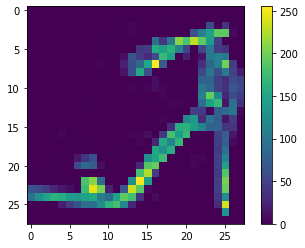

In [18]:
# Data Exploration
plt.figure()
plt.imshow(x_train[8])
plt.colorbar()

In [19]:
y_train[100]

8

In [20]:
# Normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

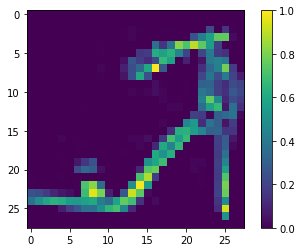

In [22]:
plt.figure()
plt.imshow(x_train[8])
plt.colorbar()

In [23]:
# Flattening the dataset
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [25]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# Step 3: Building the Model

In [26]:
# Define an object
model = tf.keras.models.Sequential()
# sequence of layers

In [29]:
# Adding first fully connected hidden layer
# 1) units (No of neurons) = 128
# 2) activation function = ReLU
# 3) input shape = 784
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

In [31]:
# Adding the second layer with dropout
model.add(tf.keras.layers.Dropout(0.3))
# regularization technique, prevents overfitting

In [32]:
# Adding the output layer
# 1) units = 10
# 2) activation = softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Step 4: Training the model

In [33]:
# Compiling the model
# 1) Optimizer = adam, (minimize the loss function)
# 2) loss function = sparse_categorical_crossentropy, (acts as guide to optimizer)
# 3) metrices = sparse_categorical_accuracy

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
__________________________________________________

In [37]:
# Training the model
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2594 - sparse_categorical_accuracy: 0.9037
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2532 - sparse_categorical_accuracy: 0.9058
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2482 - sparse_categorical_accuracy: 0.9065
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2439 - sparse_categorical_accuracy: 0.9091
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2390 - sparse_categorical_accuracy: 0.9119
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2351 - sparse_categorical_accuracy: 0.9118
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2298 - sparse_categorical_accuracy: 0.9129
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2236 - sparse_categorical_accuracy: 0.9155
Epoch 9/10
1875/1875 [==========

# Step 5: Model evaluation and prediction

In [38]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4142 - sparse_categorical_accuracy: 0.8776


In [39]:
print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.8776000142097473


In [40]:
# Model prediction
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [41]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [42]:
y_pred[110],  y_test[110] # predicted and actual output

(2, 2)

In [43]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [44]:
# Confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[791   4  11  33   8   0 145   0   8   0]
 [  0 978   1  14   2   0   4   0   1   0]
 [ 18   2 718   9 196   0  56   0   1   0]
 [ 14  16  11 875  63   0  15   0   6   0]
 [  0   1  43  19 910   0  23   0   4   0]
 [  1   0   0   0   0 938   0  39   1  21]
 [ 96   5  62  29 141   0 660   0   7   0]
 [  0   0   0   0   0   4   0 980   1  15]
 [  4   0   3   4   5   1   4   1 978   0]
 [  0   1   0   0   0   3   1  47   0 948]]


In [45]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.8776
